In [156]:
import random

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [157]:
data=pd.read_csv("github_bot_processed_data.csv")

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB


In [159]:
data.head(5)

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,NaN,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,"Time is unimportant,\nonly life important.",103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,NaN,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,NaN,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0


In [160]:
data.describe()

,public_repos,public_gists,followers,following,text_bot_count
count,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000
mean,84.139215,25.214083,245.497015,44.520741,0.061362
std,574.750217,635.690142,1535.939961,366.793439,0.341003
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,7.000000,0.000000,0.000000
50%,35.000000,2.000000,33.000000,4.000000,0.000000
75%,83.000000,10.000000,125.000000,22.000000,0.000000
max,50000.000000,55781.000000,95752.000000,27775.000000,5.000000


In [161]:
data.isna().sum()

label                 0
type                  0
site_admin            0
company               0
blog                  0
location              0
hireable              0
bio               10929
public_repos          0
public_gists          0
followers             0
following             0
created_at            0
updated_at            0
text_bot_count        0
dtype: int64

In [162]:
data["bio"].fillna("",inplace=True)

C:\Users\17100\AppData\Local\Temp\ipykernel_4160\4002542746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["bio"].fillna("",inplace=True)


In [163]:
data.isna().sum()

label             0
type              0
site_admin        0
company           0
blog              0
location          0
hireable          0
bio               0
public_repos      0
public_gists      0
followers         0
following         0
created_at        0
updated_at        0
text_bot_count    0
dtype: int64

In [164]:
data["bio"].head(5)

0                                                     
1    I just press the buttons randomly, and the pro...
2           Time is unimportant,\nonly life important.
3                                                     
4                                                     
Name: bio, dtype: object

In [165]:
import string
data["format_created_at"]=pd.to_datetime(data["created_at"])
data["format_updated_at"]=pd.to_datetime(data["updated_at"])

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   label              19768 non-null  object             
 1   type               19768 non-null  bool               
 2   site_admin         19768 non-null  bool               
 3   company            19768 non-null  bool               
 4   blog               19768 non-null  bool               
 5   location           19768 non-null  bool               
 6   hireable           19768 non-null  bool               
 7   bio                19768 non-null  object             
 8   public_repos       19768 non-null  int64              
 9   public_gists       19768 non-null  int64              
 10  followers          19768 non-null  int64              
 11  following          19768 non-null  int64              
 12  created_at         19768 non-null  object     

In [167]:
data["format_created_at"].dt.strftime("%m-%d-%Y")

0        09-26-2011
1        06-29-2015
2        08-29-2008
3        05-20-2014
4        08-16-2012
            ...    
19763    07-02-2014
19764    12-06-2017
19765    11-14-2015
19766    11-23-2021
19767    04-22-2016
Name: format_created_at, Length: 19768, dtype: object

In [168]:
data["format_updated_at"].dt.strftime("%Y-%m-%d-%H")

0        2023-10-13-11
1        2023-10-07-06
2        2023-10-02-02
3        2023-10-12-12
4        2023-10-06-11
             ...      
19763    2023-08-15-16
19764    2023-07-26-18
19765    2022-08-23-21
19766    2023-10-06-22
19767    2022-07-07-19
Name: format_updated_at, Length: 19768, dtype: object

In [169]:
data[data.loc[:,["public_gists","public_repos","followers","following"]]<=0].loc[:,["public_gists","public_repos","followers","following"]].count()

public_gists    7961
public_repos     942
followers       1445
following       6017
dtype: int64

In [170]:
data["loge_public_gists"]=np.log(data["public_gists"]+1)
data["loge_public_repos"]=np.log(data["public_repos"]+1)
data["loge_followers"]=np.log(data["followers"]+1)
data["loge_following"]=np.log(data["following"]+1)

In [171]:
data.loc[:,["loge_public_gists","loge_public_repos","loge_followers","loge_following"]].head(5)

,loge_public_gists,loge_public_repos,loge_followers,loge_following
0,0.693147,3.295837,1.791759,0.693147
1,1.386294,3.433987,2.302585,1.945910
2,3.912023,4.644391,7.100852,5.402677
3,0.000000,3.912023,4.442651,1.098612
4,0.693147,2.484907,1.945910,1.098612


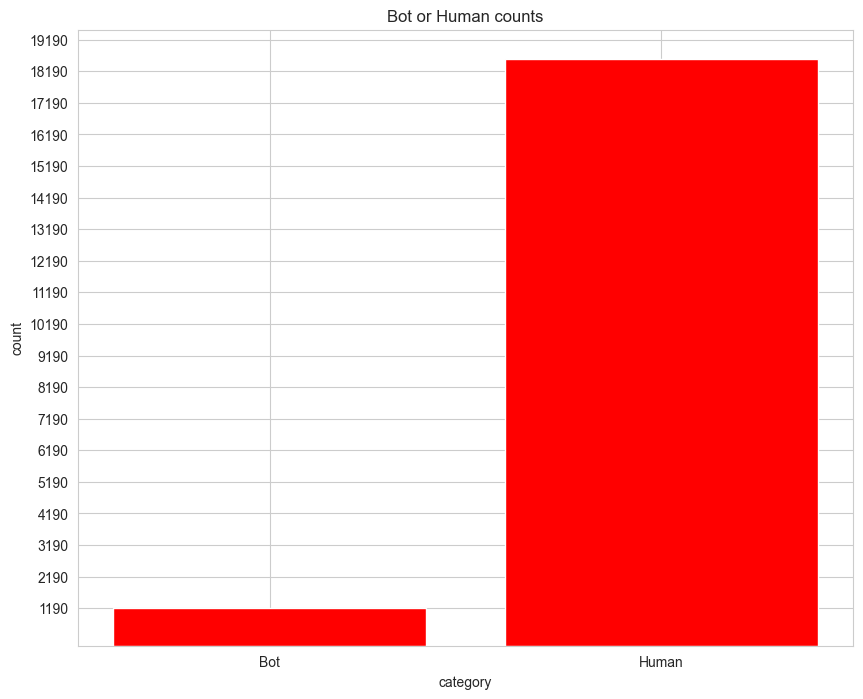

In [172]:
#绘制条形图，展现label列的类型分布
grouped=data["type"].groupby(data["label"]).count().tolist()
plt.figure(figsize=(10,8),dpi=100)
plt.bar(["Bot","Human"],grouped,color="red")
plt.yticks(range(min(grouped),max(grouped)+1000,1000))
plt.grid(True)
plt.xlabel("category")
plt.ylabel("count")
plt.title("Bot or Human counts")
plt.show()

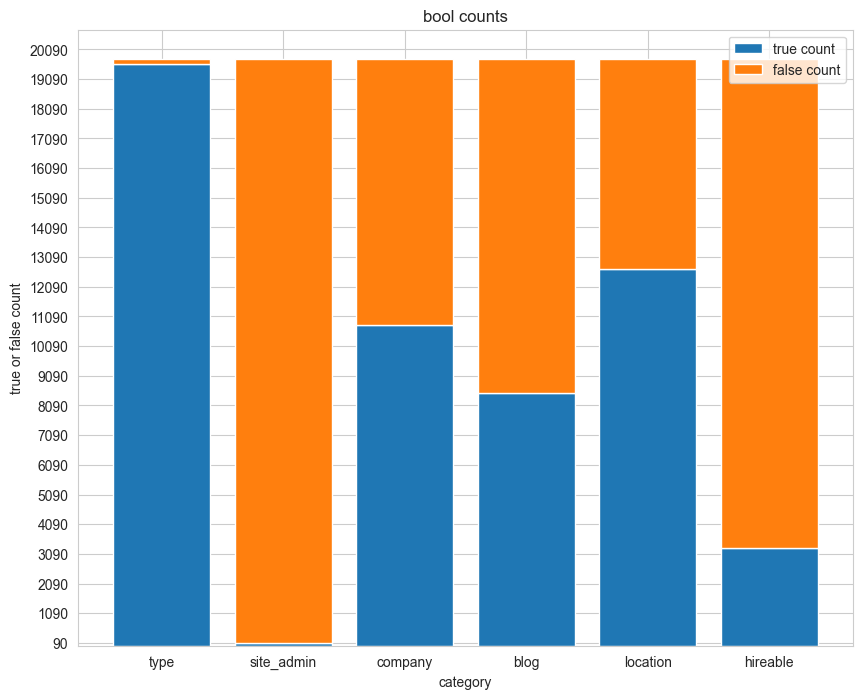

In [173]:
#展示多个布尔特征的分布
xlabels=[]
for item in data.columns:
    if data[item].dtype=="bool":
        xlabels.append(item)
list1=data.loc[:,xlabels][data.loc[:,xlabels]==1].count().tolist()
list2=data.loc[:,xlabels][data.loc[:,xlabels]==0].count().tolist()
plt.figure(figsize=(10,8),dpi=100)
plt.yticks(range(min(list1+list2),20768,1000))
plt.bar(xlabels,list1,label="true count")
plt.bar(xlabels,list2,bottom=list1,label="false count")
plt.xlabel("category")
plt.ylabel("true or false count")
plt.title("bool counts")
plt.legend()
plt.show()
    

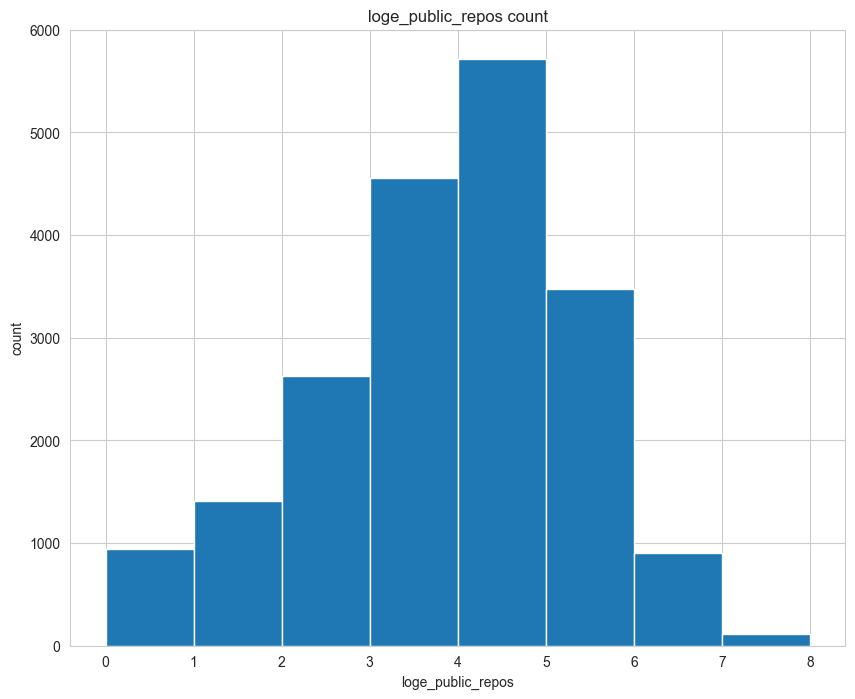

In [174]:
temp=data[data["loge_public_repos"]<=8]["loge_public_repos"].tolist()
plt.figure(figsize=(10,8),dpi=100)
plt.hist([int(i+0.5) for i in temp],bins=8)
plt.xlabel("loge_public_repos")
plt.ylabel("count")
plt.title("loge_public_repos count")
plt.grid(True)
plt.show()

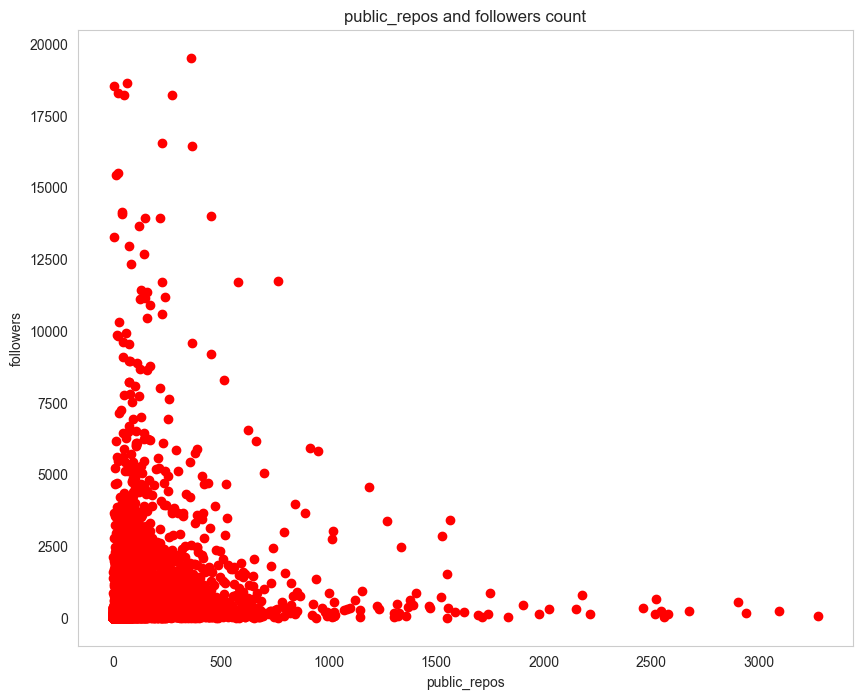

In [175]:
list7=data.loc[:,["public_repos","followers"]][(data["public_repos"]<=3500) & (data["followers"]<=20000)]["public_repos"].tolist()
list8=data.loc[:,["public_repos","followers"]][(data["public_repos"]<=3500) & (data["followers"]<=20000)]["followers"].tolist()
plt.figure(figsize=(10,8),dpi=100)
plt.scatter(list7,list8,color="red")
plt.grid(False)
plt.xlabel("public_repos")
plt.ylabel("followers")
plt.title("public_repos and followers count")
plt.show()

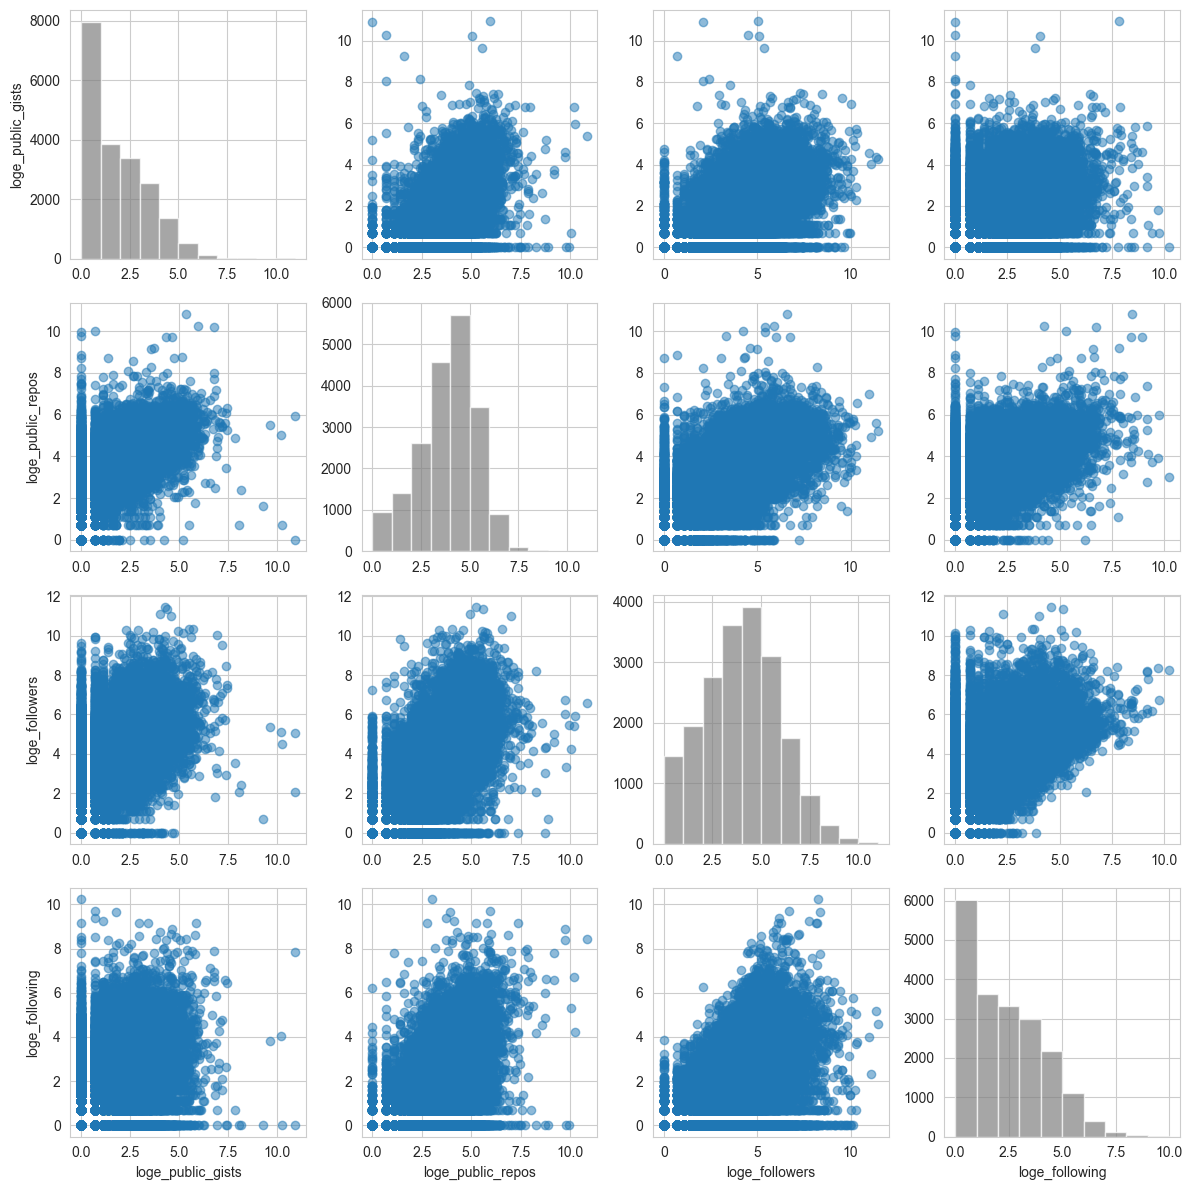

In [176]:
df=data.loc[:,["loge_public_gists","loge_public_repos","loge_followers","loge_following"]]
# 获取列名
columns = df.columns

# 创建子图
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(12, 12))

# 遍历每对列组合，绘制散点图
for i, row in enumerate(columns):
    for j, col in enumerate(columns):
        ax = axes[i, j]
        if i != j:  # 非对角线部分绘制散点图
            ax.scatter(df[col].tolist(), df[row].tolist(), alpha=0.5)
        else:  # 对角线部分绘制直方图
            ax.hist([int(i+0.5) for i in df[col].tolist()], bins=(int(max(df[col].tolist())+0.5)), color='gray', alpha=0.7)
        # 设置标题和标签
        if i == len(columns) - 1:
            ax.set_xlabel(col)
        if j == 0:
            ax.set_ylabel(row)

# 调整布局
plt.tight_layout()
plt.show()


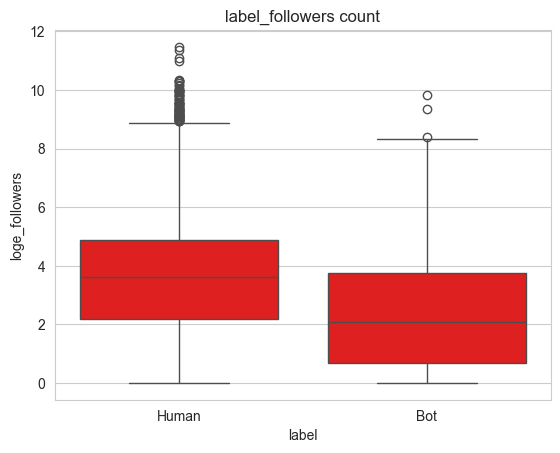

In [182]:
sns.boxplot(x="label",y="loge_followers",data=data.loc[:,["label","loge_followers"]],color="red")
plt.title("label_followers count")
plt.show()

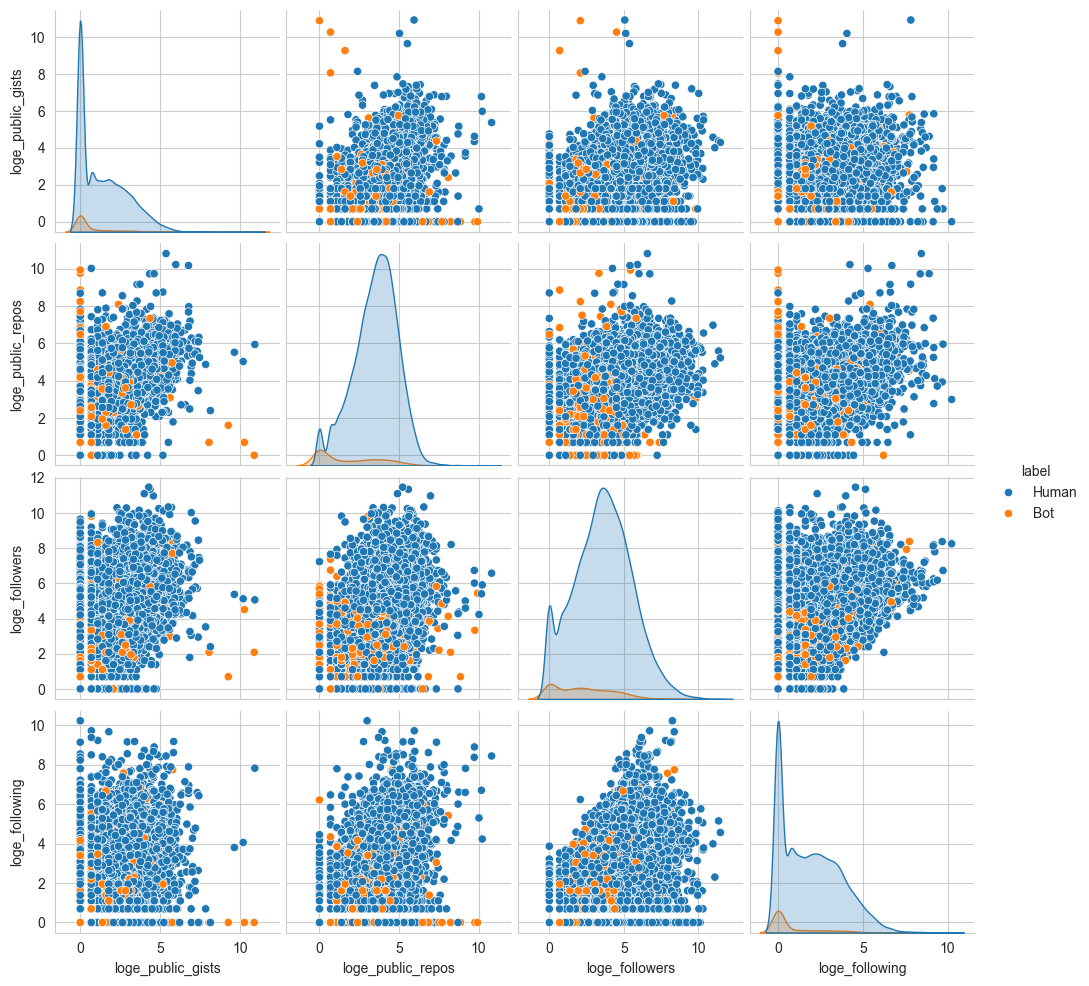

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
# 绘制成对图
sns.pairplot(data.iloc[:,[0,17,18,19,20]],hue="label")
plt.show()


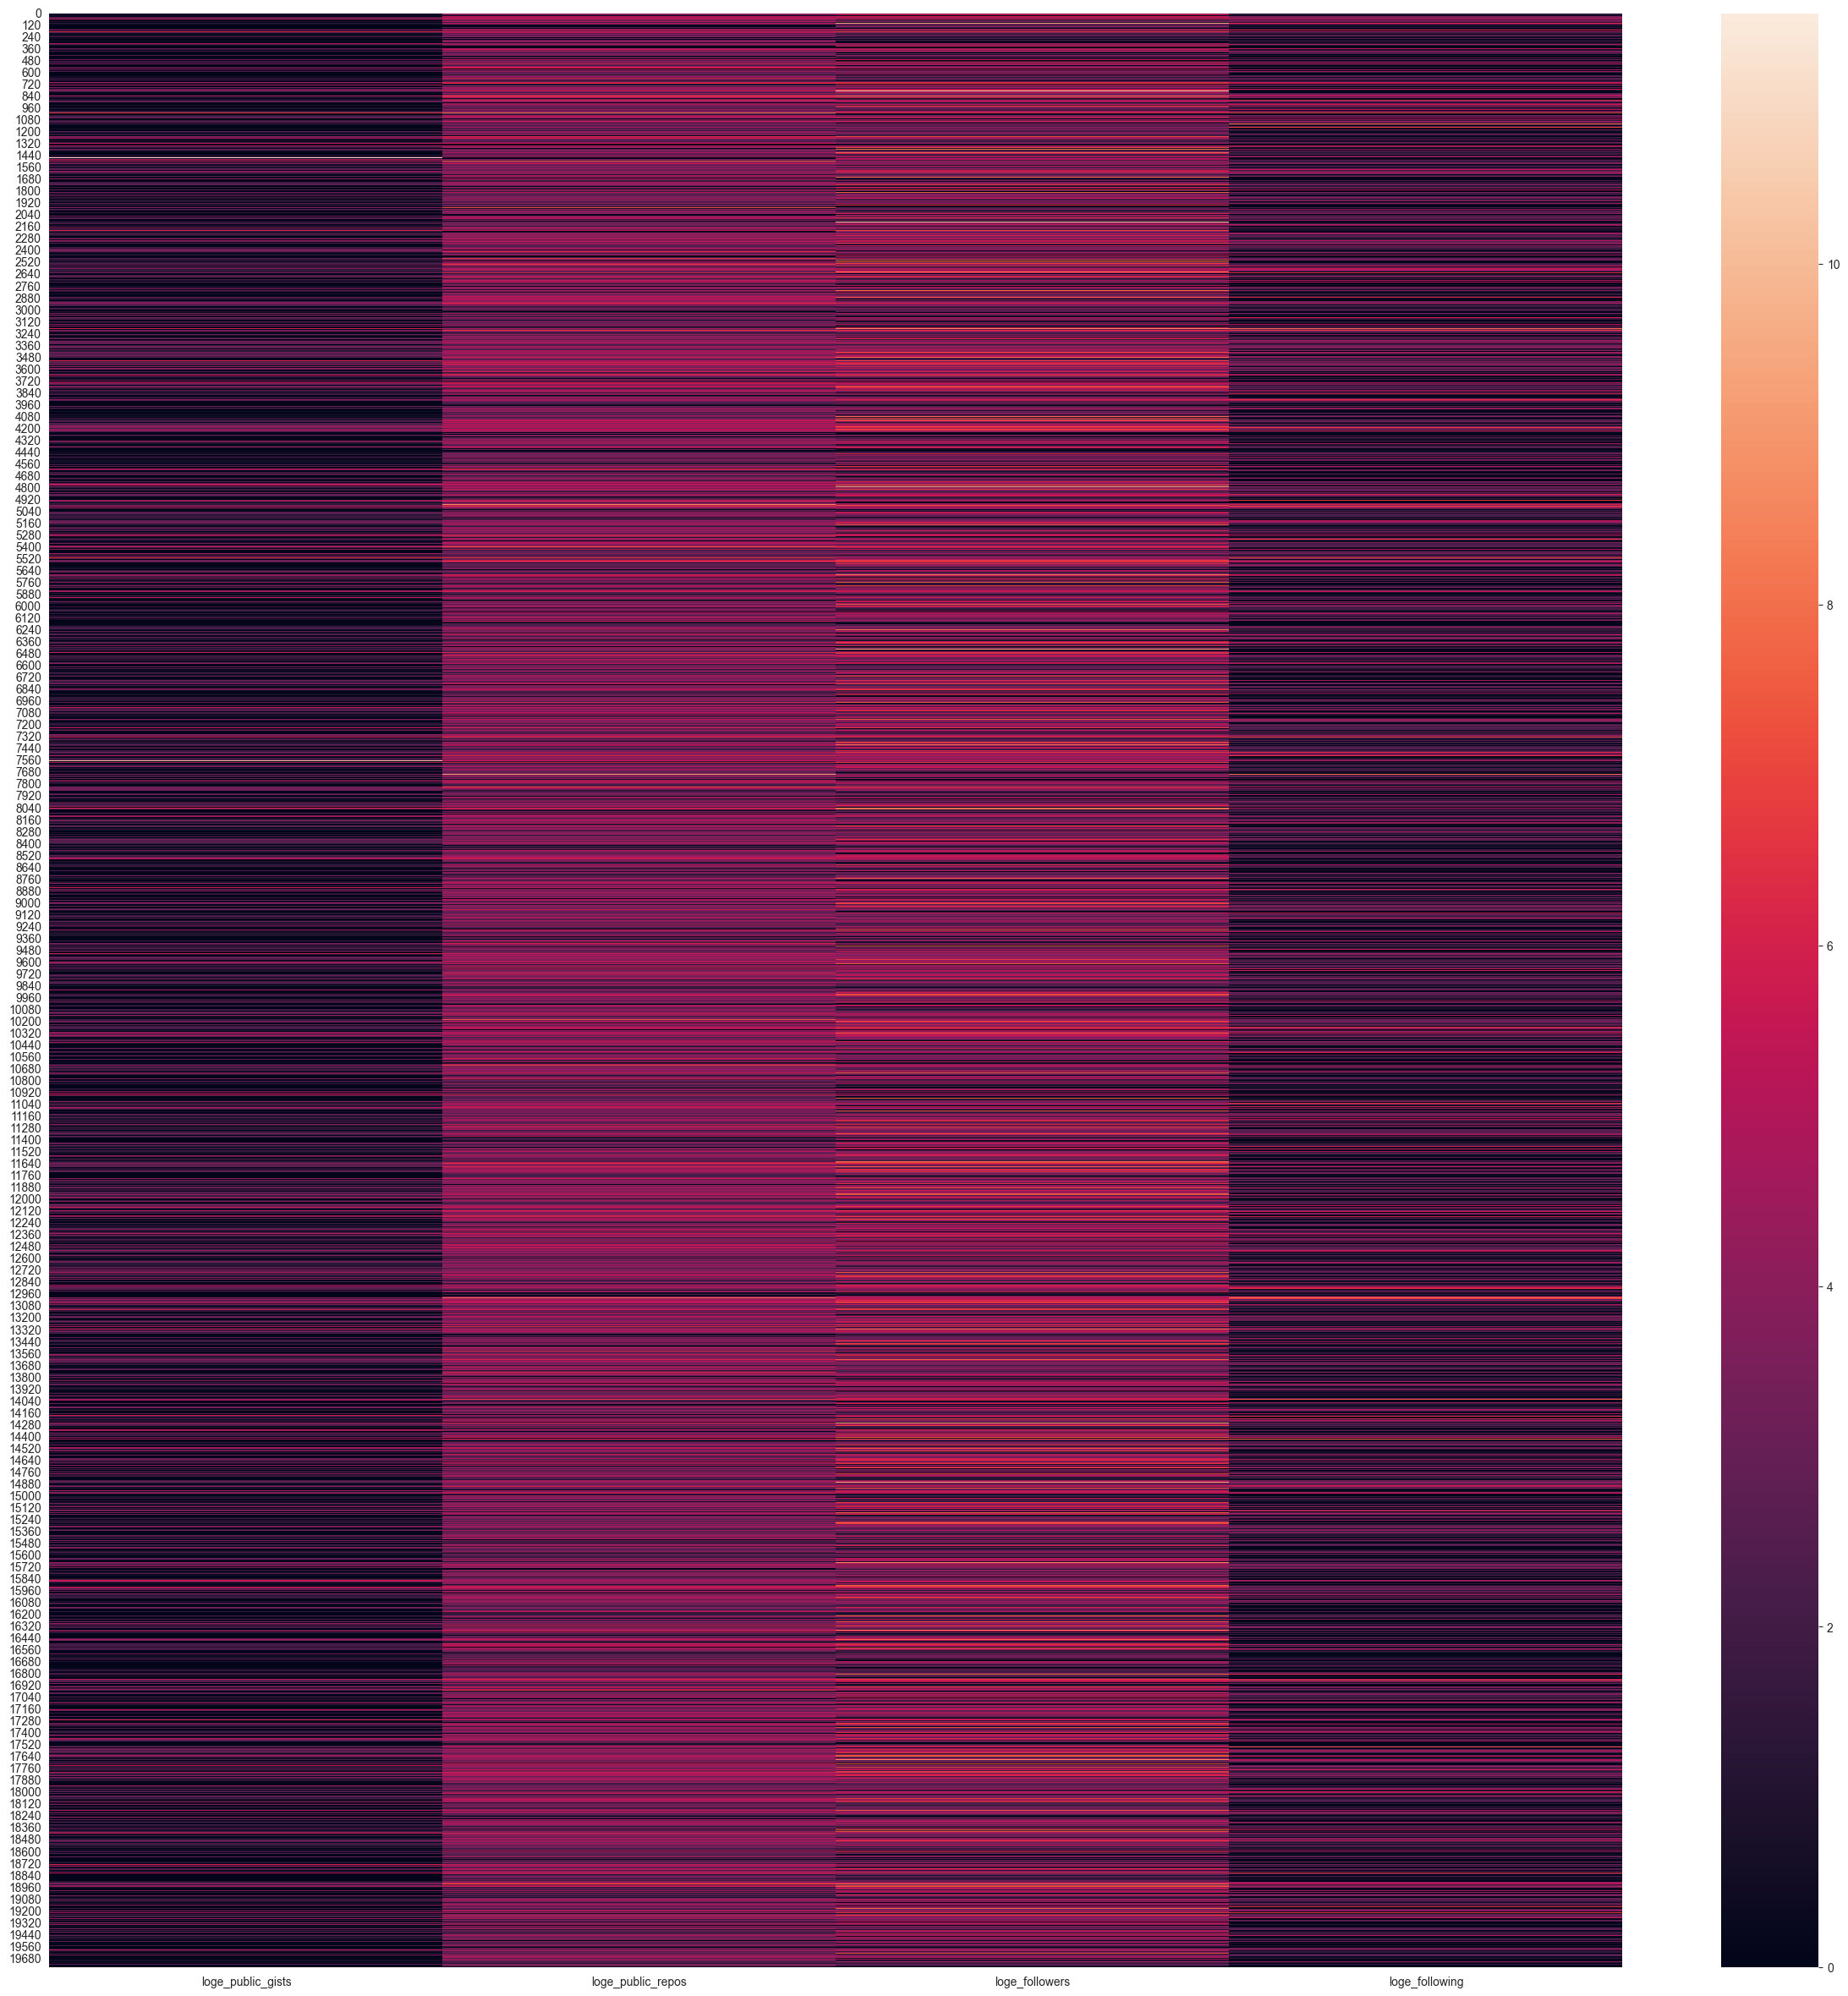

In [194]:
plt.figure(figsize=(30,30),dpi=100)
sns.heatmap(data.iloc[:,[17,18,19,20]])
plt.show()

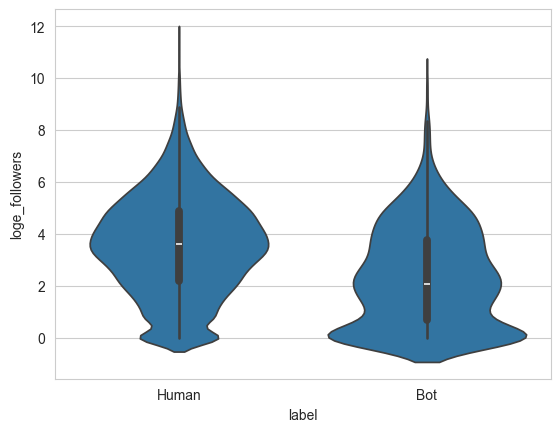

In [195]:
sns.violinplot(x="label",y="loge_followers",data=data.iloc[:,[0,19]])
plt.show()

In [215]:
import pandas as pd
from pandas_profiling import ProfileReport

# 读取数据集
df = pd.read_csv('github_bot_processed_data.csv')

# 生成报告
profile = ProfileReport(df, title="数据分析报告", explorative=True)

# 在 Jupyter Notebook 中展示
profile.to_notebook_iframe()

# 或保存为 HTML 文件
profile.to_file("data_report.html")


